<a href="https://colab.research.google.com/github/ahhhlexli/basketball_reference_scrape/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Data

In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('/content/drive/MyDrive/basketball_reference_scrape/all_data.csv', index_col=0)


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/basketball_reference_scrape/all_data.csv'

In [4]:
df.head()

,player,season,age,team,league,position,games_played,games_started,minutes,fg,fga,fg_percent,threes_made,threes_attempted,threepoint_percent,twos_made,twos_attempted,twopoint_percent,efg,ft,fta,ft_percent,orb,drb,rebounds,assists,steals,blocks,turnovers,fouls,points,trip_dbl,all_star,min_per_game,fg_per_game,fga_per_game,threes_made_per_game,threes_attempted_per_game,twos_made_per_game,twos_attempted_per_game,ft_per_game,fta_per_game,orb_per_game,drb_per_game,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,fouls_per_game,points_per_game
0,Tariq Abdul-Wahad,1997-98,23,SAC,NBA,SG,59,16,959,144,357,0.403,4,19,0.211,140,338,0.414,0.409,84,125,0.672,44,72,116,51,35,13,65,81,376,0,No,16.3,2.4,6.1,0.1,0.3,2.4,5.7,1.4,2.1,0.7,1.2,2.0,0.9,0.6,0.2,1.1,1.4,6.4
1,Tariq Abdul-Wahad,1998-99,24,SAC,NBA,SG,49,49,1205,177,407,0.435,6,21,0.286,171,386,0.443,0.442,94,136,0.691,72,114,186,50,50,16,70,121,454,0,No,24.6,3.6,8.3,0.1,0.4,3.5,7.9,1.9,2.8,1.5,2.3,3.8,1.0,1.0,0.3,1.4,2.5,9.3
2,Tariq Abdul-Wahad,1999-00,25,TOT,NBA,SG,61,56,1578,274,646,0.424,3,23,0.130,271,623,0.435,0.426,146,193,0.756,101,190,291,98,59,28,106,147,697,0,No,25.9,4.5,10.6,0.0,0.4,4.4,10.2,2.4,3.2,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4
3,Tariq Abdul-Wahad,1999-00,25,ORL,NBA,SG,46,46,1205,223,515,0.433,2,21,0.095,221,494,0.447,0.435,115,151,0.762,77,162,239,72,53,16,87,116,563,0,No,26.2,4.8,11.2,0.0,0.5,4.8,10.7,2.5,3.3,1.7,3.5,5.2,1.6,1.2,0.3,1.9,2.5,12.2
4,Tariq Abdul-Wahad,1999-00,25,DEN,NBA,SG,15,10,373,51,131,0.389,1,2,0.500,50,129,0.388,0.393,31,42,0.738,24,28,52,26,6,12,19,31,134,0,No,24.9,3.4,8.7,0.1,0.1,3.3,8.6,2.1,2.8,1.6,1.9,3.5,1.7,0.4,0.8,1.3,2.1,8.9


In [5]:
df.columns

Index(['player', 'season', 'age', 'team', 'league', 'position', 'games_played',
       'games_started', 'minutes', 'fg', 'fga', 'fg_percent', 'threes_made',
       'threes_attempted', 'threepoint_percent', 'twos_made', 'twos_attempted',
       'twopoint_percent', 'efg', 'ft', 'fta', 'ft_percent', 'orb', 'drb',
       'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'fouls',
       'points', 'trip_dbl', 'all_star', 'min_per_game', 'fg_per_game',
       'fga_per_game', 'threes_made_per_game', 'threes_attempted_per_game',
       'twos_made_per_game', 'twos_attempted_per_game', 'ft_per_game',
       'fta_per_game', 'orb_per_game', 'drb_per_game', 'rebounds_per_game',
       'assists_per_game', 'steals_per_game', 'blocks_per_game',
       'turnovers_per_game', 'fouls_per_game', 'points_per_game'],
      dtype='object')

In [6]:
df[(df.team == 'TOT')]

,player,season,age,team,league,position,games_played,games_started,minutes,fg,fga,fg_percent,threes_made,threes_attempted,threepoint_percent,twos_made,twos_attempted,twopoint_percent,efg,ft,fta,ft_percent,orb,drb,rebounds,assists,steals,blocks,turnovers,fouls,points,trip_dbl,all_star,min_per_game,fg_per_game,fga_per_game,threes_made_per_game,threes_attempted_per_game,twos_made_per_game,twos_attempted_per_game,ft_per_game,fta_per_game,orb_per_game,drb_per_game,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,fouls_per_game,points_per_game
2,Tariq Abdul-Wahad,1999-00,25,TOT,NBA,SG,61,56,1578,274,646,0.424,3,23,0.130,271,623,0.435,0.426,146,193,0.756,101,190,291,98,59,28,106,147,697,0,No,25.9,4.5,10.6,0.0,0.4,4.4,10.2,2.4,3.2,1.7,3.1,4.8,1.6,1.0,0.5,1.7,2.4,11.4
6,Tariq Abdul-Wahad,2001-02,27,TOT,NBA,SG,24,12,441,55,147,0.374,1,2,0.500,54,145,0.372,0.378,24,33,0.727,41,43,84,24,20,10,27,56,135,0,No,18.4,2.3,6.1,0.0,0.1,2.3,6.0,1.0,1.4,1.7,1.8,3.5,1.0,0.8,0.4,1.1,2.3,5.6
17,Shareef Abdur-Rahim,2003-04,27,TOT,NBA,PF,85,56,2684,501,1054,0.475,9,34,0.265,492,1020,0.482,0.480,373,429,0.869,189,450,639,174,68,37,184,222,1384,0,No,31.6,5.9,12.4,0.1,0.4,5.8,12.0,4.4,5.0,2.2,5.3,7.5,2.0,0.8,0.4,2.2,2.6,16.3
29,Alex Acker,2008-09,26,TOT,NBA,SG,25,0,199,30,76,0.395,7,20,0.350,23,56,0.411,0.441,5,10,0.500,8,16,24,12,5,4,7,9,72,0,No,8.0,1.2,3.0,0.3,0.8,0.9,2.2,0.2,0.4,0.3,0.6,1.0,0.5,0.2,0.2,0.3,0.4,2.9
35,Quincy Acy,2013-14,23,TOT,NBA,SF,63,0,847,66,141,0.468,4,15,0.267,62,126,0.492,0.482,35,53,0.660,72,144,216,28,23,26,30,122,171,0,No,14.0,1.1,2.3,0.0,0.2,1.0,2.1,0.5,0.8,1.2,2.4,3.6,0.4,0.3,0.4,0.5,2.0,2.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12249,Tyler Zeller,2017-18,28,TOT,NBA,C,66,34,1109,187,334,0.560,10,28,0.357,177,306,0.578,0.575,57,79,0.722,110,195,305,47,15,35,47,126,441,0,No,7.6,1.6,3.8,0.0,0.4,1.6,3.4,1.6,2.0,0.2,1.2,1.4,0.0,0.0,0.0,0.2,1.6,4.8
12252,Tyler Zeller,2018-19,29,TOT,NBA,C,6,1,93,16,30,0.533,0,1,0.000,16,29,0.552,0.533,14,18,0.778,11,13,24,4,1,3,4,20,46,0,No,7.1,1.1,2.9,0.3,0.9,0.8,2.0,0.6,0.6,0.3,0.9,1.1,0.1,0.2,0.3,0.4,0.8,2.9
12259,George Zídek,1996-97,23,TOT,NBA,C,52,2,376,49,118,0.415,0,2,0.000,49,116,0.422,0.415,45,57,0.789,35,51,86,14,5,3,27,61,143,0,No,5.5,1.0,2.1,0.0,0.0,1.0,2.1,1.3,1.6,0.6,0.8,1.4,0.3,0.1,0.0,0.3,1.1,3.3
12262,George Zídek,1997-98,24,TOT,NBA,C,12,0,64,7,29,0.241,1,2,0.500,6,27,0.222,0.259,14,16,0.875,4,13,17,2,0,2,4,10,29,0,No,3.7,0.5,2.3,0.2,0.3,0.3,2.0,0.7,0.7,0.0,0.7,0.7,0.2,0.0,0.0,0.2,0.8,1.8


Remove any rows with traded players - keep only season totals

In [28]:
df = df[~((df[['player', 'season']].duplicated()) & (df.team != 'TOT'))]


In [90]:
df[df.player == 'Chris Bosh']

,player,season,age,team,league,position,games_played,games_started,minutes,fg,fga,fg_percent,threes_made,threes_attempted,threepoint_percent,twos_made,twos_attempted,twopoint_percent,efg,ft,fta,ft_percent,orb,drb,rebounds,assists,steals,blocks,turnovers,fouls,points,trip_dbl,all_star,min_per_game,fg_per_game,fga_per_game,threes_made_per_game,threes_attempted_per_game,twos_made_per_game,twos_attempted_per_game,ft_per_game,fta_per_game,orb_per_game,drb_per_game,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,fouls_per_game,points_per_game
1350,Chris Bosh,2003-04,19,TOR,NBA,C,75,63,2510,327,712,0.459,5,14,0.357,322,698,0.461,0.463,202,288,0.701,191,366,557,78,59,106,107,215,861,0,No,36.3,6.8,13.7,0.1,0.3,6.7,13.4,5.0,6.1,1.8,6.5,8.3,1.9,0.8,0.6,1.8,2.2,18.7
1351,Chris Bosh,2004-05,20,TOR,NBA,PF,81,81,3017,473,1005,0.471,3,10,0.300,470,995,0.472,0.472,412,542,0.760,194,524,718,153,76,113,187,226,1361,0,No,35.2,6.9,14.2,0.2,0.6,6.7,13.5,4.0,4.9,1.6,6.3,7.9,1.8,0.9,0.8,2.1,2.2,18.0
1352,Chris Bosh,2005-06,21,TOR,NBA,C,70,70,2751,549,1087,0.505,0,13,0.000,549,1074,0.511,0.505,474,581,0.816,204,443,647,181,50,79,157,209,1572,0,Yes,33.2,6.6,12.3,0.3,1.0,6.3,11.3,3.3,4.1,1.8,5.0,6.8,1.7,0.9,1.4,1.7,2.3,16.6
1353,Chris Bosh,2006-07,22,TOR,NBA,C,69,69,2658,543,1094,0.496,12,35,0.343,531,1059,0.501,0.502,463,590,0.785,186,555,741,175,39,90,179,163,1561,0,Yes,32.0,6.2,12.1,0.9,2.8,5.3,9.3,2.8,3.4,1.2,5.4,6.6,1.1,1.0,1.0,1.6,2.4,16.2
1354,Chris Bosh,2007-08,23,TOR,NBA,C,67,67,2425,507,1027,0.494,10,25,0.400,497,1002,0.496,0.499,472,559,0.844,174,409,583,171,63,67,153,157,1496,0,Yes,35.4,7.8,16.9,1.4,3.8,6.4,13.1,4.1,5.3,1.0,6.0,7.0,2.2,0.9,0.6,2.2,1.6,21.1
1355,Chris Bosh,2008-09,24,TOR,NBA,C,77,77,2928,615,1263,0.487,12,49,0.245,603,1214,0.497,0.492,504,617,0.817,215,556,771,191,67,77,174,189,1746,0,Yes,33.5,6.8,14.5,1.5,4.2,5.2,10.3,4.0,5.1,0.9,6.5,7.4,2.4,0.7,0.6,1.5,1.9,19.1
1356,Chris Bosh,2009-10,25,TOR,NBA,C,70,70,2526,600,1158,0.518,8,22,0.364,592,1136,0.521,0.522,470,590,0.797,205,554,759,166,43,68,169,170,1678,0,Yes,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1357,Chris Bosh,2010-11,26,MIA,NBA,PF,77,77,2795,524,1056,0.496,6,25,0.240,518,1031,0.502,0.499,384,471,0.815,141,500,641,144,59,49,138,172,1438,0,Yes,5.8,1.2,2.7,0.4,1.3,0.8,1.4,0.5,0.5,0.6,1.4,2.0,0.1,0.2,0.9,0.3,1.1,3.3
1358,Chris Bosh,2011-12,27,MIA,NBA,PF,57,57,2007,393,807,0.487,10,35,0.286,383,772,0.496,0.493,229,279,0.821,94,358,452,103,51,45,117,128,1025,0,Yes,13.2,2.3,4.8,0.6,1.9,1.7,2.9,1.5,1.9,1.7,2.7,4.5,0.4,0.4,1.0,0.5,1.8,6.6
1359,Chris Bosh,2012-13,28,MIA,NBA,C,74,74,2454,485,907,0.535,21,74,0.284,464,833,0.557,0.546,241,302,0.798,131,370,501,123,66,101,128,168,1232,0,Yes,23.2,4.7,8.7,1.7,3.6,3.0,5.1,2.2,2.9,1.9,4.6,6.5,1.0,0.6,1.9,0.7,2.7,13.2


# Number of All Stars & Who are All Stars

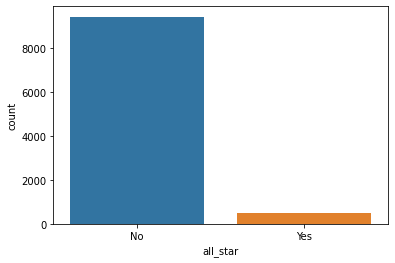

In [30]:
sns.countplot(data=df, x='all_star')

In [31]:
all_stars = df[df.all_star == 'Yes']

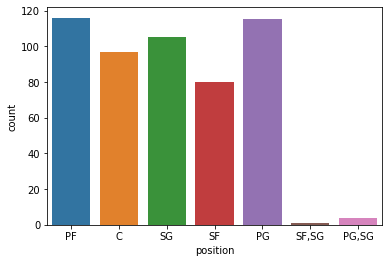

In [32]:
sns.countplot(data=all_stars, x='position')

Most Frequent All Stars

In [77]:
most_as = all_stars['player'].value_counts()[:20].reset_index()
most_as.rename(columns={"index": "player", "player": "selections"}, inplace=True)
most_as

,player,selections
0,Kobe Bryant,18
1,LeBron James,17
2,Kevin Garnett,15
3,Tim Duncan,15
4,Dirk Nowitzki,14
5,Dwyane Wade,13
6,Chris Bosh,11
7,Chris Paul,11
8,Kevin Durant,11
9,Allen Iverson,11


(6.0, 19.0)

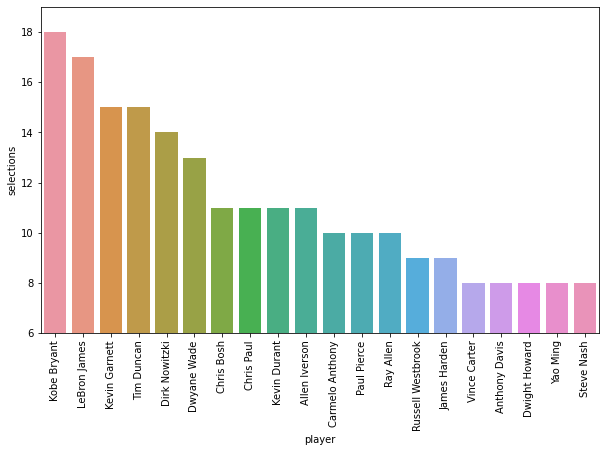

In [80]:
plt.subplots(figsize=(10,6))
sns.barplot(data=most_as, x='player', y='selections')
plt.xticks(rotation=90)
plt.ylim(6, 19)

In [82]:
all_stars.columns

Index(['player', 'season', 'age', 'team', 'league', 'position', 'games_played',
       'games_started', 'minutes', 'fg', 'fga', 'fg_percent', 'threes_made',
       'threes_attempted', 'threepoint_percent', 'twos_made', 'twos_attempted',
       'twopoint_percent', 'efg', 'ft', 'fta', 'ft_percent', 'orb', 'drb',
       'rebounds', 'assists', 'steals', 'blocks', 'turnovers', 'fouls',
       'points', 'trip_dbl', 'all_star', 'min_per_game', 'fg_per_game',
       'fga_per_game', 'threes_made_per_game', 'threes_attempted_per_game',
       'twos_made_per_game', 'twos_attempted_per_game', 'ft_per_game',
       'fta_per_game', 'orb_per_game', 'drb_per_game', 'rebounds_per_game',
       'assists_per_game', 'steals_per_game', 'blocks_per_game',
       'turnovers_per_game', 'fouls_per_game', 'points_per_game'],
      dtype='object')

In [86]:
all_stars['points_per_game'].describe()

count    518.000000
mean      16.014286
std        8.714333
min        0.000000
25%        7.725000
50%       17.200000
75%       23.075000
max       36.100000
Name: points_per_game, dtype: float64

In [88]:
all_stars[all_stars.points_per_game == 0]

,player,season,age,team,league,position,games_played,games_started,minutes,fg,fga,fg_percent,threes_made,threes_attempted,threepoint_percent,twos_made,twos_attempted,twopoint_percent,efg,ft,fta,ft_percent,orb,drb,rebounds,assists,steals,blocks,turnovers,fouls,points,trip_dbl,all_star,min_per_game,fg_per_game,fga_per_game,threes_made_per_game,threes_attempted_per_game,twos_made_per_game,twos_attempted_per_game,ft_per_game,fta_per_game,orb_per_game,drb_per_game,rebounds_per_game,assists_per_game,steals_per_game,blocks_per_game,turnovers_per_game,fouls_per_game,points_per_game
1356,Chris Bosh,2009-10,25,TOR,NBA,C,70,70,2526,600,1158,0.518,8,22,0.364,592,1136,0.521,0.522,470,590,0.797,205,554,759,166,43,68,169,170,1678,0,Yes,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1361,Chris Bosh,2014-15,30,MIA,NBA,C,44,44,1556,343,745,0.460,63,168,0.375,280,577,0.485,0.503,179,232,0.772,46,264,310,95,41,25,95,69,928,0,Yes,2.5,0.0,0.5,0.0,0.0,0.0,0.5,0.0,0.0,0.5,0.0,0.5,0.5,0.5,0.0,0.0,0.0,0.0
6883,Kyle Lowry,2019-20,33,TOR,NBA,PG,58,58,2098,334,803,0.416,164,466,0.352,170,337,0.504,0.518,294,343,0.857,32,260,292,433,82,26,178,190,1126,2,Yes,6.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11331,Dwyane Wade,2007-08,26,MIA,NBA,SG,51,49,1954,439,937,0.469,22,77,0.286,417,860,0.485,0.480,354,467,0.758,45,169,214,354,87,37,224,137,1254,0,Yes,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


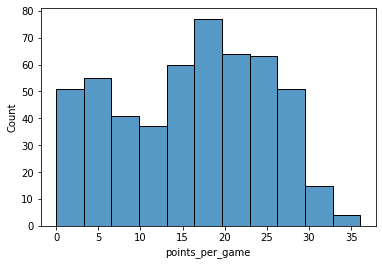

In [85]:
sns.histplot(data=all_stars, x='points_per_game')